In [23]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv'
weather_df = pd.read_csv(url, sep=',')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Shape of the data frame, 8425 shows number of rows and 23 shows number of columns

weather_df.shape

(8425, 23)

In [4]:
# Unique values in each column

weather_df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [5]:
# Statstical Analysis of the data frame

weather_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [6]:
# Datatypes of the dataframe

weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# Calcuating null values in the data

weather_df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
# Replacing Null values of different columns with the Backward fill method (Value of next non-null value) or Forward fill method (Value of previous non-null value)

weather_df['MinTemp'].fillna(method='bfill', inplace=True)
weather_df['MaxTemp'].fillna(method='bfill', inplace=True)
weather_df['Rainfall'].fillna(method='bfill', inplace=True)
weather_df['Evaporation'].fillna(method='bfill', inplace=True)
weather_df['Sunshine'].fillna(method='bfill', inplace=True)
weather_df['WindGustDir'].fillna(method='bfill', inplace=True)
weather_df['WindGustSpeed'].fillna(method='ffill', inplace=True)
weather_df['WindDir9am'].fillna(method='ffill', inplace=True)
weather_df['WindDir3pm'].fillna(method='ffill', inplace=True)
weather_df['WindSpeed9am'].fillna(method='ffill', inplace=True)
weather_df['WindSpeed3pm'].fillna(method='ffill', inplace=True)
weather_df['Humidity9am'].fillna(method='ffill', inplace=True)
weather_df['Humidity3pm'].fillna(method='ffill', inplace=True)
weather_df['Pressure9am'].fillna(method='ffill', inplace=True)
weather_df['Pressure3pm'].fillna(method='ffill', inplace=True)
weather_df['Cloud9am'].fillna(method='ffill', inplace=True)
weather_df['Cloud3pm'].fillna(method='ffill', inplace=True)
weather_df['Temp9am'].fillna(method='ffill', inplace=True)
weather_df['Temp3pm'].fillna(method='ffill', inplace=True)
weather_df['RainToday'].fillna(method='ffill', inplace=True)
weather_df['RainTomorrow'].fillna(method='ffill', inplace=True)

weather_df.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           1
Rainfall          0
Evaporation      39
Sunshine         39
WindGustDir       1
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          2
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [9]:
# Replacing the existing null values

for i in weather_df.columns:
    maxtemp_mean = weather_df['MaxTemp'].mean()
    weather_df['MaxTemp'].fillna(maxtemp_mean, inplace=True)

for i in weather_df.columns:
    evap_mean = weather_df['Evaporation'].mean()
    weather_df['Evaporation'].fillna(evap_mean, inplace=True)

for i in weather_df.columns:
    sunshine_mean = weather_df['Sunshine'].mean()
    weather_df['Sunshine'].fillna(sunshine_mean, inplace=True)

for i in weather_df.columns:
    cloud3pm_mean = weather_df['Cloud3pm'].mean()
    weather_df['Cloud3pm'].fillna(cloud3pm_mean, inplace=True)

weather_df['WindGustDir'].fillna(method='ffill', inplace=True)

weather_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
# Building the correlation matrix

corrs = weather_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

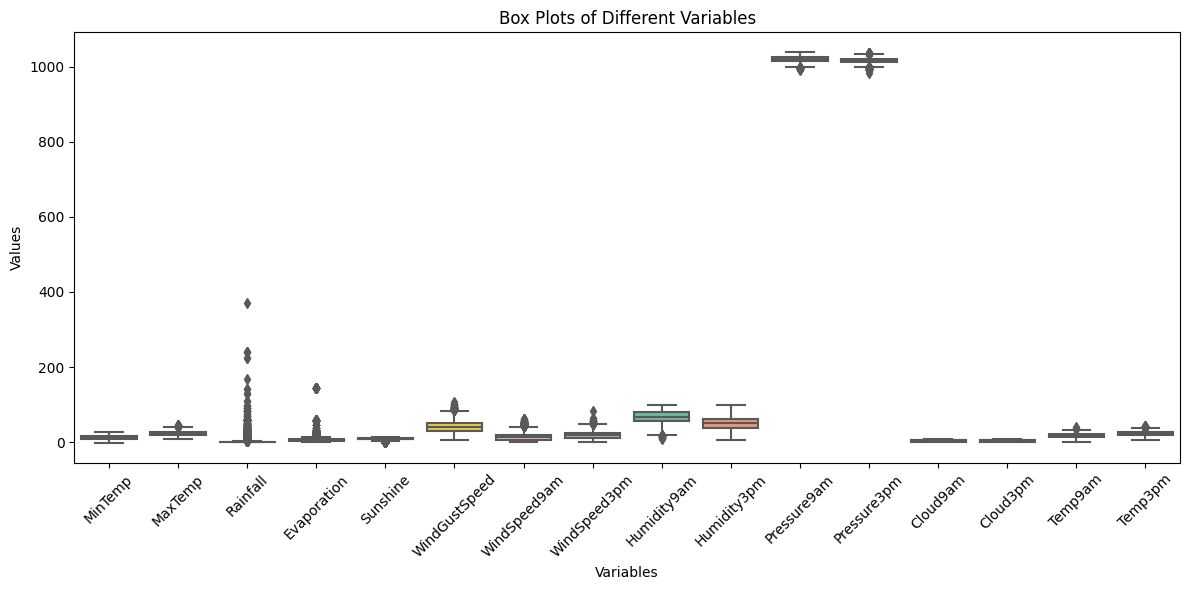

In [11]:
# Box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Dropping two columns with very varied datapoints and Date column as well, as it is of no use while creating model later

weather_df.drop(['Date', 'Pressure9am', 'Pressure3pm'], axis=1, inplace = True)

In [13]:
# Number of outliers in each column

count_outliers = lambda column: (column < column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25))) | (column > column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25)))

columns = []

for i in weather_df:
  if weather_df[i].dtypes == "float64":
    columns.append(i)

for column in columns:
    num_outliers = count_outliers(weather_df[column]).sum()
    print(f"Column '{column}' has {num_outliers} outliers.")

Column 'MinTemp' has 0 outliers.
Column 'MaxTemp' has 34 outliers.
Column 'Rainfall' has 1572 outliers.
Column 'Evaporation' has 398 outliers.
Column 'Sunshine' has 888 outliers.
Column 'WindGustSpeed' has 55 outliers.
Column 'WindSpeed9am' has 135 outliers.
Column 'WindSpeed3pm' has 36 outliers.
Column 'Humidity9am' has 22 outliers.
Column 'Humidity3pm' has 0 outliers.
Column 'Cloud9am' has 0 outliers.
Column 'Cloud3pm' has 0 outliers.
Column 'Temp9am' has 5 outliers.
Column 'Temp3pm' has 51 outliers.


In [14]:
# Rectifying outlier using Winsorizing method

lower_bound = weather_df.quantile(0.25)
upper_bound = weather_df.quantile(0.75)

# Apply Winsorizing to each column

for column in columns:
    weather_df[column] = np.where(weather_df[column] < lower_bound[column], lower_bound[column], weather_df[column])
    weather_df[column] = np.where(weather_df[column] > upper_bound[column], upper_bound[column], weather_df[column])

In [15]:
# Again checking outliers

for column in columns:
    num_outliers = count_outliers(weather_df[column]).sum()
    print(f"Column '{column}' has {num_outliers} outliers.")

Column 'MinTemp' has 0 outliers.
Column 'MaxTemp' has 0 outliers.
Column 'Rainfall' has 0 outliers.
Column 'Evaporation' has 0 outliers.
Column 'Sunshine' has 0 outliers.
Column 'WindGustSpeed' has 0 outliers.
Column 'WindSpeed9am' has 0 outliers.
Column 'WindSpeed3pm' has 0 outliers.
Column 'Humidity9am' has 0 outliers.
Column 'Humidity3pm' has 0 outliers.
Column 'Cloud9am' has 0 outliers.
Column 'Cloud3pm' has 0 outliers.
Column 'Temp9am' has 0 outliers.
Column 'Temp3pm' has 0 outliers.


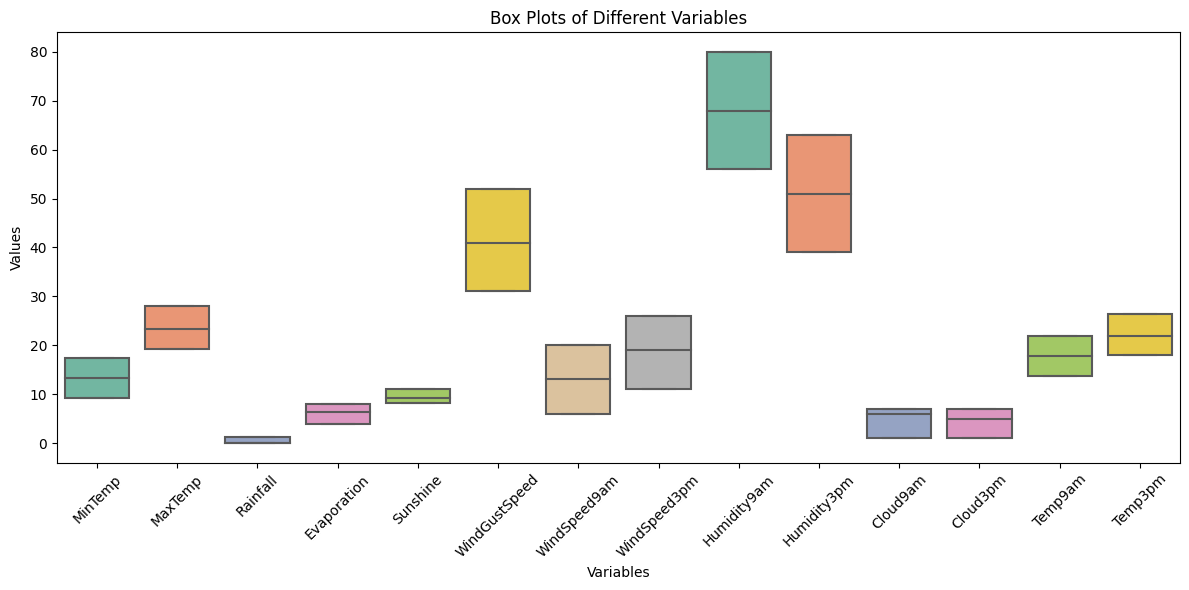

In [16]:
# Again plotting box plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

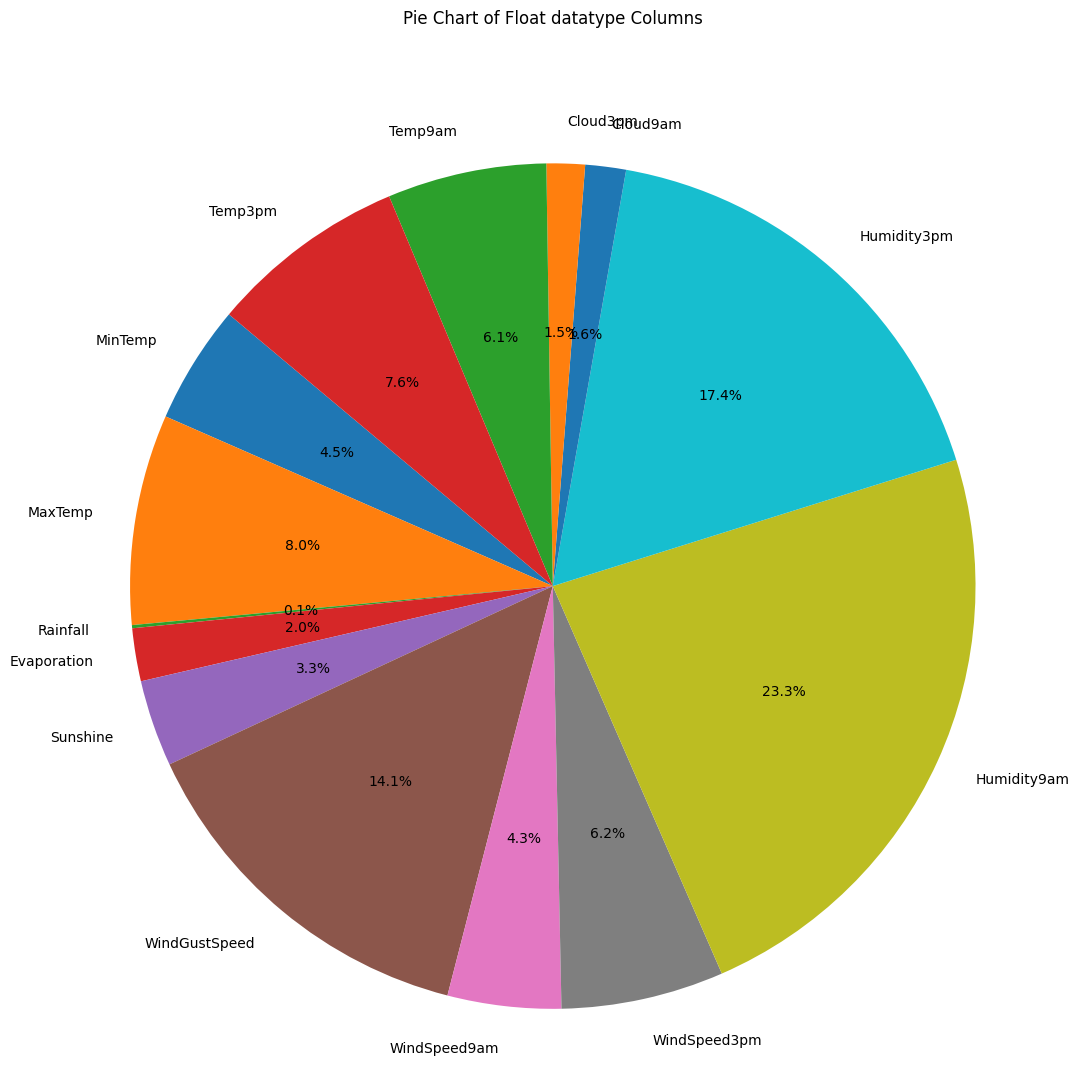

In [17]:
# Plotting pie chart of the dataframe

float_columns = weather_df.select_dtypes(include=['float64'])
column_sums = float_columns.mean()

plt.figure(figsize=(12, 12))
plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Float datatype Columns', y=1.1)
plt.show()

In [18]:
# Copying the dataframe for building two models

weather_df_2 = weather_df.copy()
weather_df_2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,8.0,9.0,W,44.0,W,WNW,20.0,24.0,71.0,39.0,7.0,4.411136,16.9,21.8,No,No
1,Albury,9.2,25.1,0.0,8.0,9.0,WNW,44.0,NNW,WSW,6.0,22.0,56.0,39.0,7.0,4.411136,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,8.0,9.0,WSW,46.0,W,WSW,19.0,26.0,56.0,39.0,7.0,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,8.0,9.0,NE,31.0,SE,E,11.0,11.0,56.0,39.0,7.0,2.000000,18.1,26.4,No,No
4,Albury,17.4,28.1,1.0,8.0,9.0,W,41.0,ENE,NW,7.0,20.0,80.0,39.0,7.0,7.000000,17.8,26.4,No,No


# Model -1 Foreacsting whether or not it will rain tomorrow that is column  "RainTomorrow"

In [19]:
# Convert categorical columns into dummy variables

weather_df = pd.get_dummies(weather_df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], drop_first=True)

In [20]:
# Extracting the independent and dependent variables

X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow']

In [21]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 63)

In [24]:
svm_model = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [25]:
# Predictions

y_pred = svm_model.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [26]:
# Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \n", accuracy)
print()
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion)
print()
classification_report = classification_report(y_test, y_pred)
print("Classification Report: \n", classification_report)

Accuracy: 
 0.8302670623145401

Confusion Matrix: 
 [[1217   78]
 [ 208  182]]

Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.94      0.89      1295
         Yes       0.70      0.47      0.56       390

    accuracy                           0.83      1685
   macro avg       0.78      0.70      0.73      1685
weighted avg       0.82      0.83      0.82      1685



# Model -2 Predicting how much rainfall could be there that is column "Rainfall"

In [27]:
# Convert categorical columns into dummy variables

weather_df_2 = pd.get_dummies(weather_df_2, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], drop_first=True)

In [28]:
# Extracting the independent and dependent variables

X = weather_df_2.drop(['Rainfall'], axis=1)
y = weather_df_2['Rainfall']

In [30]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 242)

In [31]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([ 1.14839634,  0.07602301,  0.13050493, ...,  0.01886764,
        0.12895583, -0.09163228])

In [33]:
# Evaluation metrics for determining the model performance

print("Mean Squarerd Error :", mean_squared_error(y_test, y_pred))
print()
print("R Sqaure :", r2_score(y_test, y_pred))
print()
print("Model Coefficient :", regressor.coef_)
print()
print("Model Intercept :", regressor.intercept_)
print()
print("Explained Variance Score :", explained_variance_score(y_test, y_pred))
print()
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print()
print("Median Absolute Error :", median_absolute_error(y_test, y_pred))

Mean Squarerd Error : 0.03526461112650987

R Sqaure : 0.862855658784083

Model Coefficient : [ 1.18860565e-02 -2.65833846e-03 -3.98397440e-03  1.78802020e-03
  1.66444771e-03  2.80077046e-04  1.08136983e-03  3.63140172e-03
  1.63937602e-04  3.54566765e-03  1.51597664e-03 -1.37017179e-03
 -4.14615303e-03  1.73672742e-02  8.01184076e-03 -1.07100686e-02
 -1.63800295e-02  4.69063486e-02  3.73552761e-03  3.94797646e-02
  1.52203800e-02  2.18176957e-02  4.43930043e-02 -2.48559649e-02
  1.33802539e-02  2.00278683e-02  8.40497081e-03  3.71192978e-02
  3.03288838e-02  1.89515814e-02  4.51582503e-02  3.84017303e-02
  4.31908520e-02  3.70285597e-02  6.18155563e-02  2.47488394e-02
  5.84511451e-02  5.69353507e-02  5.36342256e-02 -2.12543368e-03
  1.55471327e-02  2.04899481e-02  3.82347408e-03  8.15136762e-03
  3.94067999e-02  2.11430696e-02  2.43046731e-03  2.33609489e-02
  1.97402510e-02  3.01849447e-02  5.35189842e-02  5.86806858e-03
  2.62574674e-02  5.11480635e-02 -7.15302335e-03 -2.57027944e-